# Regression Decision-Tree Algorithm Applications to Boston Housing Dataset 

## Dataset Description/Project Motivations
As quoted from the below description for this dataset, the Boston dataset was used in many Machine Learning papers that address regression. For the purpose of this project, I have imported it directly from the sklearn package but it is also stored on the UCI ML database. 

The Boston Housing Prices dataset is a famous dataset also often used by Machine Learning beginners to develop their understanding of regression problems. The dataset contains 506 observations and 13 predictive features. These features are used to predict the median housing value in neighborhoods in the Boston Suburbs. 

I decided to practice Regression Decision Tree Algorithms with this dataset to increase my practical understanding of the algorithm as well as its predictive behavior.

## Software and Libraries

This project uses the following software and Python libraries:

* pandas
* NumPy
* seaborn 
* matplotlib
* scikit-learn
* graphviz 
* math

## Project Objective

* Using Decision Tree/Random Forest Regression Algorithm to predict housing prices in Boston
* Basic data exploration
* Develop skills in Python

![Boston Machine Learning](https://thelovedchild.net/wp-content/uploads/2015/07/Boston-night-1080x675.jpg)

## Import Dataset and Perform Cleaning/Validation

First, I will import the dependent packages for the project as well as the dataset from the sklearn package. 

In [777]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_squared_error
import graphviz
import math
# Add Plots inline for increased clarity
%matplotlib inline

# Hide Warnings 
import warnings 
warnings.filterwarnings('ignore')
##Import Data
import pandas as pd
# Load dataset
from sklearn.datasets import load_boston
boston = load_boston()

The Describe function gives a quick look into the dataset observations, summary, and attribute descriptions. Especially useful during the first time looking at the dataset. 

In [778]:
##Dataset description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

The dataset comes from the sklearn package so I will need to convert the dataset into a dataframe, add the relevant column names, and add the price data.

In [779]:
##Convert Boston data to dataframe
bos = pd.DataFrame(boston.data)

In [780]:
##Add columns to boston dataset 
bos.columns = boston.feature_names

In [781]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [782]:
##Add features/Columns to dataset
bos['Price'] = boston.target

## Data Cleaning/Data Exploration

In the Data Cleaning/Exploration step, I will first look into some descriptive statistics, address outliers/nulls (if necessary), then look into the correlations between attributes and price.

A quick summary through the describe function shows the standard deviation, min value, 25th percentile, 50th percentile, 75th percentile, and max value of each feature in the Boston dataset. The describe function can be useful for determining whether possible outliers exist.

I have also rounded to two decimal places for ease of interpretation.

Further analysis into the distribution of Price reveals the below: 
* Min Price: $ 5,000 

* Max Price: $ 50,000

* Mean Price: $ 22,532

* Median Price: $ 21,200

* Standard Deviation Price: $ 9,188

In [784]:
##Summary Statistics 
round(bos.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.59,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.65,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [785]:
# Minimum price of the data
minimum_price = np.min(bos.Price)

# Maximum price of the data
maximum_price = np.max(bos.Price)

# Mean price of the data
mean_price = np.mean(bos.Price)

# Median price of the data
median_price = np.median(bos.Price)

# Standard deviation of prices of the data
std_price = np.std(bos.Price)

# Show the calculated statistics
print('Statistical Analysis:')
print('Min Price:', '$', minimum_price*1000) 
print('Max Price:', '$', maximum_price*1000)
print('Mean Price:', '$', mean_price*1000)
print('Median Price:', '$', median_price*1000)
print('Standard Deviation Price:','$', std_price*1000)

Statistical Analysis:
Min Price: $ 5000.0
Max Price: $ 50000.0
Mean Price: $ 22532.806324110697
Median Price: $ 21200.0
Standard Deviation Price: $ 9188.011545278207


### Outlier Search
A quick boxplot/histogram analysis can help determine whether the dataset has outliers that need removal. It looks like neighborhoods priced at $50,000 may be outliers but I will leave these observations in for now. 

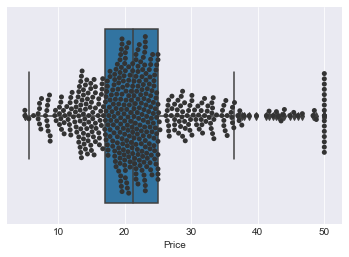

In [786]:
ax = sns.boxplot(x="Price", data=bos)
ax = sns.swarmplot(x="Price", data=bos, color=".20", dodge= True)
ax

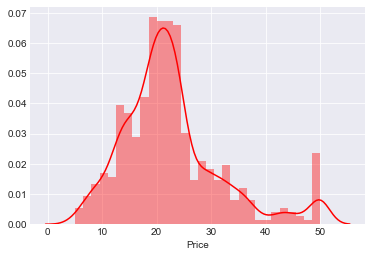

In [787]:
graph1 = sns.distplot(bos.Price, bins=30, color='red')
graph1

### Null Search
It is important to check for null values as these values will need to be filled or excluded from the analysis depending on situation. It seems there are no null values in the dataset. No data cleaning is needed for this dataset for now but I will look into those outliers later.

In [788]:
#Null Check Function
bos.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

## Analysis of the Correlations between attributes and housing price

### Feature Analysis
The dataset contains the below 13 features: 
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per $10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population

I will now look at the correlations between price and the attributes.


#### CRIM - per capita crime rate by town

Decreased rate of crime seem to correlate somewhat with Higher Housing Price 

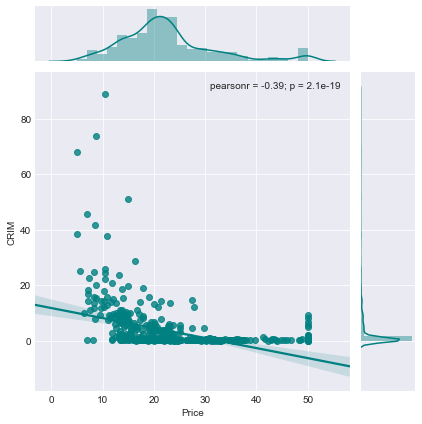

In [789]:
sns.jointplot(data=bos,x='Price', y='CRIM', kind='reg', color='teal')

#### ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 
Residential land zoned for lots over 25k seem to correlate slightly with Price. 

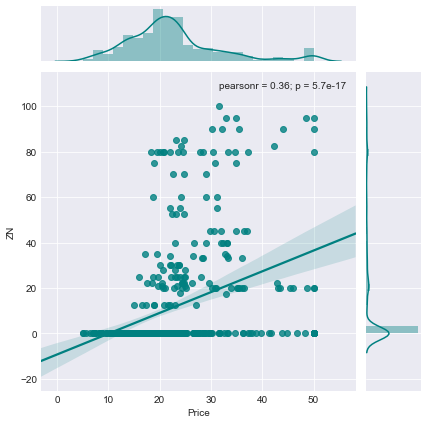

In [790]:
sns.jointplot(data=bos,x='Price', y='ZN', kind='reg', color='teal')

#### INDUS- Proportion of non-retail business acres per town.
Proportion of non-retail business seems to have a negative correlation with price

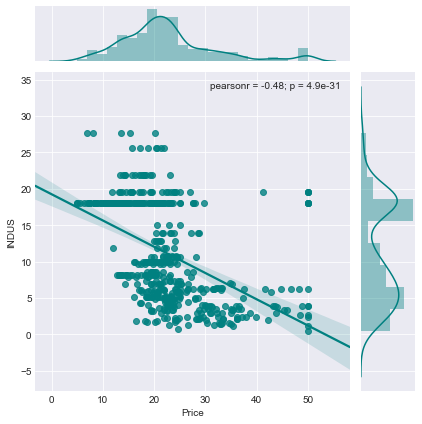

In [791]:
sns.jointplot(data=bos,x='Price', y='INDUS', kind='reg', color='teal')

#### CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
There does not seem to much correlation between price and the Charles River

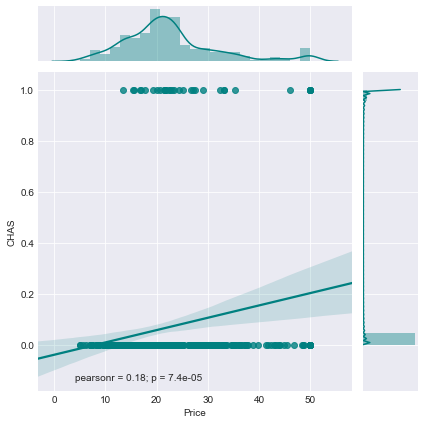

In [792]:
sns.jointplot(data=bos,x='Price', y='CHAS', kind='reg', color='teal')

#### NOX- nitric oxides concentration (parts per 10 million)
There is a slight correlation with more nitric oxide and reduced price- 
This could possibly be due to cheaper housing being located in more polluted areas.

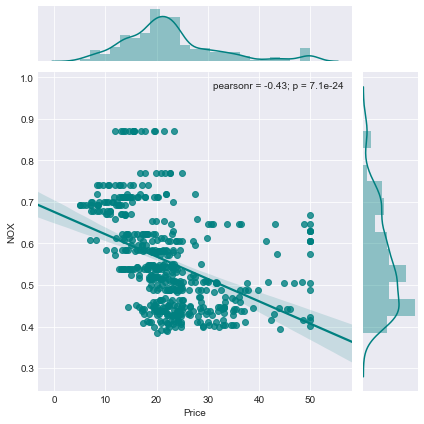

In [793]:
sns.jointplot(data=bos,x='Price', y='NOX', kind='reg', color='teal')

#### RM- average number of rooms per dwelling
More rooms correlate with an increase in prices in the neighborhood

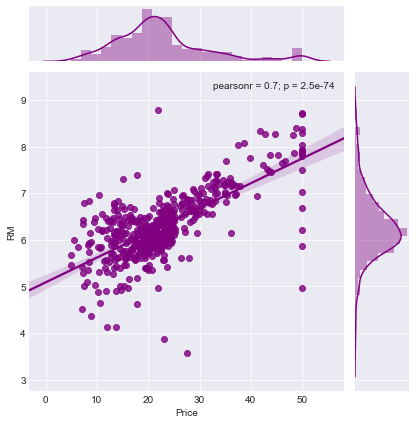

In [794]:
sns.jointplot(data=bos,x='Price', y='RM', kind='reg',color='purple')

#### AGE- proportion of owner-occupied units built prior to 1940
Neighborhoods with newer housing units seem correlate with increased prices 

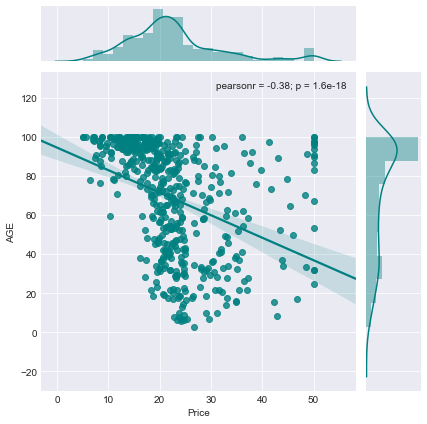

In [795]:
sns.jointplot(data=bos,x='Price', y='AGE', kind='reg',color='teal')

#### DIS- weighted distances to five Boston employment centres
Being located closer to Boston employment centres seems to correlate with higher neighborhood housing value

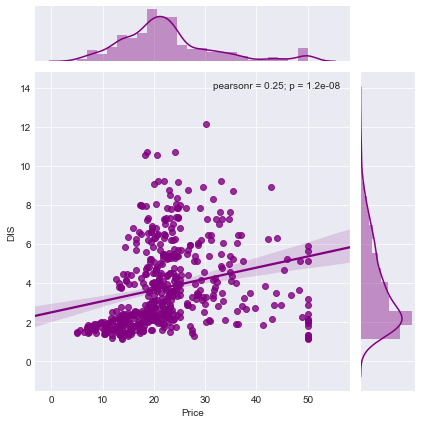

In [796]:
sns.jointplot(data=bos,x='Price', y='DIS', kind='reg',color='purple')

#### RAD- index of accessibility to radial highways
RAD does not seem to have much affect on the overall price.

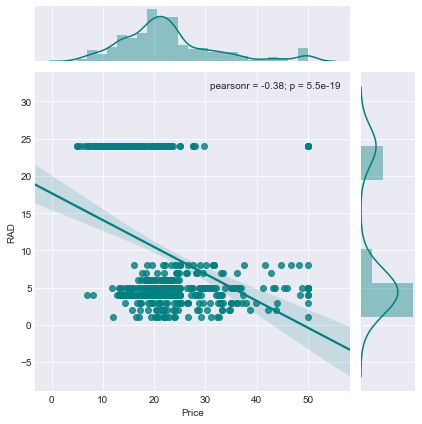

In [797]:
sns.jointplot(data=bos,x='Price', y='RAD', kind='reg', color='teal')

#### TAX- full-value property-tax rate per $10,000
There is a downward trend with lower taxes and higher home value. 
However there are also some lower priced homes with higher property tax. 

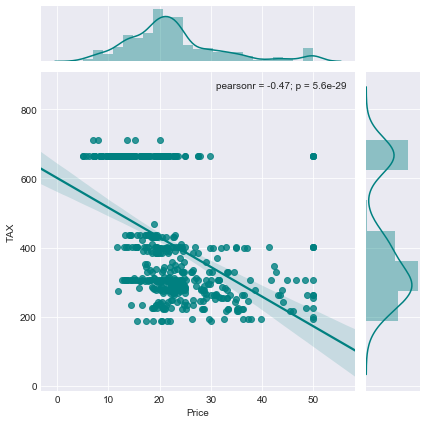

In [798]:
sns.jointplot(data=bos,x='Price', y='TAX', kind='reg', color='teal')

#### PTRATIO- pupil-teacher ratio by town
Areas with lower pupil-teacher ratio seem to exhibit higher prices. 
Generally speaking poorer neighborhoods have a higher ratio of pupil to teacher due to lack of funding. 

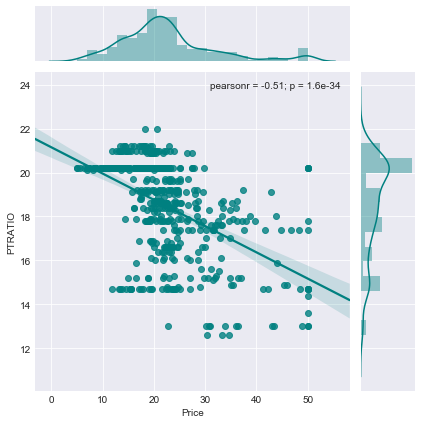

In [799]:
sns.jointplot(data=bos,x='Price', y='PTRATIO', kind='reg',color='teal')

#### B- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
Proportion of blacks by town does contribute to house prices in some areas 
but there are high priced areas with high proportion of blacks. 
This shows that not all areas are impacted by this feature.

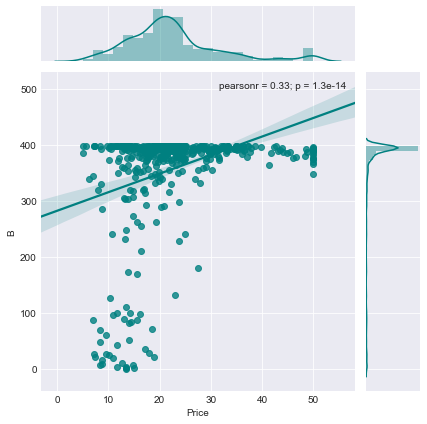

In [800]:
sns.jointplot(data=bos,x='Price', y='B', kind='reg', color='teal')

#### LSTAT- % lower status of the population 
LSTAT has a high correlation with housing price. 

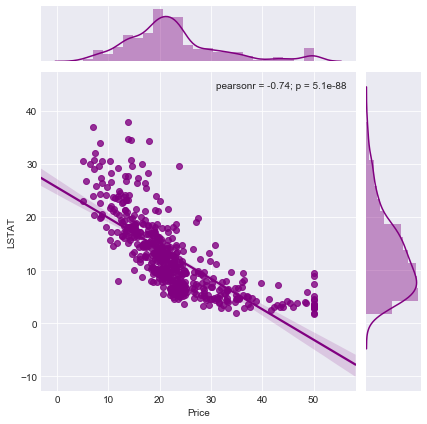

In [801]:
sns.jointplot(data=bos,x='Price', y='LSTAT', kind='reg', color='purple')

## Data Preparation for Machine Learning - Regression Decision Tree 

### Step I - Split the Independent and Dependent Variables into separate datasets
The data must be split into a 2 datasets. One for the Independent variables (features) and another for the Dependent variable (category).

In [653]:
##Create table excluding the(Dependent Var)
X = bos.iloc[:, 0:13].values
##Create table for only Dependent Var
y = bos.iloc[:, 13].values

### Step II - Split the Datasets into a Training Set and Test Set
The data must also be split into a training set as one has not been provided. I am using the sklearn package to perform the training and test data split and decided to perform an 80:20 ratio split. I have also added the random_state argument to vary the data.  

80 % for Training and 20 % for Testing/Validation purposes.

In [802]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

### Step III - Fit the Regressor to the Training Set
I am using the sklearn package and decision tree regressor function to fit the regressor to the training set.  
In addition, the criterion argument can be used to specify method for determining splits. 
The (MSE) Mean Squared Error is typically used to evaluate tree split quality in regression trees. I have set the max_leaf_nodes to 5 for simplicity.  

In [803]:
# Fitting the Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(max_leaf_nodes=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Step IV - Perform Predictions with Test Set
The predict function is then used to create predictions with the test observations. 
The y_pred variable reveals what each of the observations in the test set were predictively priced as.

In [804]:
# Predicting Test set results 
y_pred = regressor.predict(X_test)

### Step V - Visualize Predictions with Scatter Plot
The Scatter Plot with Predictions(Red) and Actual Values(Blue) provides insight into how well the median housing values were classified for the test set. It is also a useful visualization to see the Predicted vs Actual results.

Although the line is not perfect it is pretty close. 

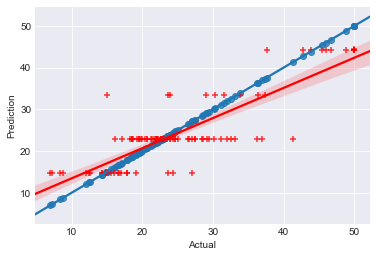

In [805]:
# Visualize Prediction vs Actual Cross Validation 
TestDF = pd.DataFrame({'Actual':y_test, 'Prediction': y_pred})
#Plot Actual values
sns.regplot(x=TestDF['Actual'], y=TestDF['Actual'])
#Plot Predicted values
sns.regplot(x=TestDF['Actual'], y=TestDF['Prediction'], marker="+", color='Red')
#Legend and show
plt.legend()
plt.show()

### Step VI - Evaluation of Model
The MSE function helps us evaluate the efficiency of the model. 
The sqrt is, 5.93 indicating that this model gives predictions that are within around $ 5931.93 of the true median home value for the suburb!

Not bad for a first attempt and minimal intervention. 

In [806]:
##Mean Squared Error for Validation of Accuracy
mse = mean_squared_error(y_test, y_pred)
print('mse =', mse)
print('sqrt =', math.sqrt(mse))


print('The sqrt is,', round(math.sqrt(mse),2), 'indicating that this model gives predictions that are within around', '$',round(math.sqrt(mse)*1000,2), 'of the true median home value for the suburb!') 


mse = 29.8357662335
sqrt = 5.46221257674137
The sqrt is, 5.46 indicating that this model gives predictions that are within around $ 5462.21 of the true median home value for the suburb!


## Decision Tree Visualization 
The below decision tree was visualized with the graphviz package and details all of the decision tree logic used to classify the training set.  

#### Decision Tree Terminology: 

* 1st Row - Internal Node (Condition) 
* 2nd Row - MSE (Split Evaluator for Regression Tree) 
* 3rd Row - Number of observations in node
* 4th Row - Resultant Value (If Terminal Node) 


In [807]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(regressor, out_file=None,
                         feature_names=boston.feature_names,
                         class_names=boston.target,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

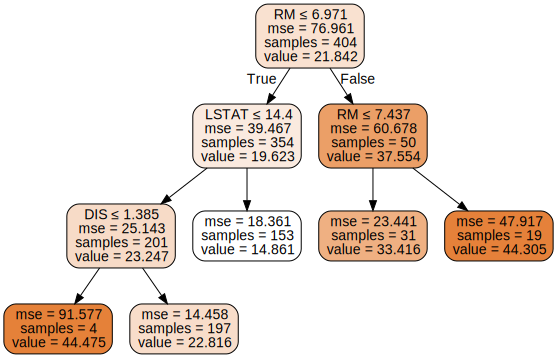

In [808]:
graph

## Feature Engineering
With a setting of 5 max leaf nodes it seems the model only tried to use 3 features for tree construction(RM, LSTAT, and DIS). As tree's are created through recursive binary search (greedy methods) these features may have the highest impact on price. Further look into the features on a scatter plot reveals that the RM, LSTAT, and DIS features are highly correlated with median neighbood price. 

Hypothesis for feature importance: 
* RM: 
 * With more Rooms a higher MEDV(Price) is expected. 
 * More Rooms in a house highly correlates with higher price as the residence has more space. Typically these are for family type homes. 
* LSTAT: 
 * With Lower LSTAT a higher MEDV(Price) is expected. 
 * LSTAT is an indicator of "social class"- Areas with more people of "upper status" would demand higher prices while areas with more people considered of "lower status" would be in lower demand/lower priced.
* DIS: 
 * With an Increase in LSTAT a higher MEDV(Price) is expected.
 * DIS is a factor that tells us how far a home is from an employment center. There is a slight upward trend with distance and price. Typically there are more expensive homes in suburbs instead of really urban areas. 


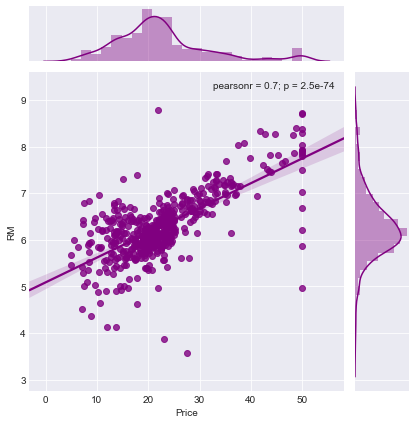

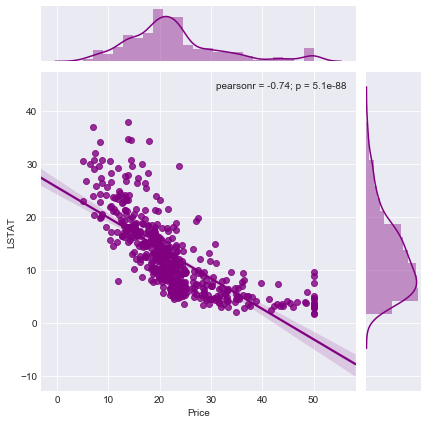

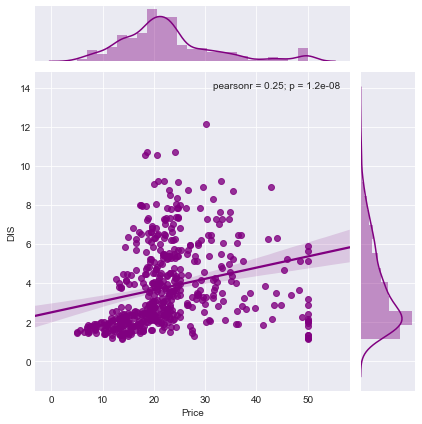

In [810]:
## Visualize Graphs 
sns.jointplot(data=bos,x='Price', y='RM', kind='reg',color='purple')
sns.jointplot(data=bos,x='Price', y='LSTAT', kind='reg', color='purple')
sns.jointplot(data=bos,x='Price', y='DIS', kind='reg',color='purple')

## Random Forest Application to Boston Dataset
The datasets have already been prepared so I will skip straight to fitting the classifier to the Random Forest Algorithm.

Random Forest is a form of ensemble learning which combines many decision trees to make a prediction. 
Random forests provide an improvement over bagged trees through de-correlation of the trees. In comparison to normal decision trees, random forests sacrifice ease of interpretation for predictive accuracy and also have many modern uses.

I am using the sklearn package and ensemble library as well as the random forest classifier function to fit the classifier to the training set.  
    
The n_estimators argument is used to specify how many trees to utilize. I have specified 100 trees for this random forest and the default criterion is MSE. 

In [811]:
## Random Forest 
from sklearn.ensemble import RandomForestRegressor 
RFregressor = RandomForestRegressor(n_estimators =100, random_state = 0)
RFregressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Perform Predictions with Test Set
The predict function is then used to create predictions with the test observations. 
The RFy_pred variable reveals what each of the test observations were priced as.

In [812]:
# Predicting Test set results 
RFy_pred = RFregressor.predict(X_test)

### Visualize Predictions with Scatter Plot
The Scatter Plot with Predictions(Red) and Actual Values(Blue) provides insight into how well the median housing values were predicted for the test set. It is also a useful visualization to see the Predicted vs Actual results.

The line is much more closely fitted in comparison to the original decision tree model. 

The RFDF dataframe also allows us to interpret the actual value vs predicted value by observation.

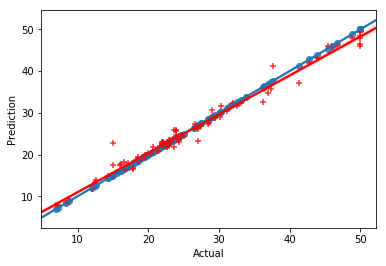

In [674]:
# Visualize Prediction vs Actual
RFDF = pd.DataFrame({'Actual':y_test, 'Prediction': RFy_pred})
#Plot Actual values
sns.regplot(x=RFDF['Actual'], y=RFDF['Actual'])
#Plot Predicted values
sns.regplot(x=RFDF['Actual'], y=RFDF['Prediction'], marker="+", color='Red')
#Legend and show
plt.legend()
plt.show()

In [675]:
RFDF

,Actual,Prediction
0,28.4,27.421
1,31.1,30.511
2,23.5,23.811
3,26.6,27.287
4,19.6,19.465
5,14.3,14.770
6,50.0,48.026
7,14.3,14.689
8,20.7,20.763
9,37.6,41.172


### Evaluation of the Random Forest Model
The MSE function helps evaluate the efficiency of the model. 
The sqrt is, 1.5 indicating that this model gives predictions that are within around $ 1501.71 of the true median home value for the suburb! This is quite the improvement from the original Decision Tree used. 

In [676]:
##Mean Squared Error for Validation of Accuracy
RFmse = mean_squared_error(y_test, RFy_pred)
print('mse =', RFmse)
print('sqrt =', math.sqrt(RFmse))


print('The sqrt is,', round(math.sqrt(RFmse),2), 'indicating that this model gives predictions that are within around', '$',round(math.sqrt(RFmse)*1000,2), 'of the true median home value for the suburb!') 


mse = 2.2551309902
sqrt = 1.501709356099265
The sqrt is, 1.5 indicating that this model gives predictions that are within around $ 1501.71 of the true median home value for the suburb!


### Feature Validation 
Looking into the features again reveals that the most feature importance was placed in RM, LSTAT, and DIS for the Random Forest Model. This helps validates my previous hypotheses.

In [809]:
##Feature Correlation Analysis for Random Forest
print(sorted(zip(map(lambda x: round(x, 4), RFregressor.feature_importances_), bos[0:13]), 
             reverse=True))

[(0.45710000000000001, 'RM'), (0.35020000000000001, 'LSTAT'), (0.0654, 'DIS'), (0.040099999999999997, 'CRIM'), (0.0206, 'NOX'), (0.0161, 'PTRATIO'), (0.014999999999999999, 'TAX'), (0.0118, 'B'), (0.0117, 'AGE'), (0.0060000000000000001, 'INDUS'), (0.0038999999999999998, 'RAD'), (0.0011000000000000001, 'ZN'), (0.001, 'CHAS')]


## Conclusion

Although I would not implement this model into a production environment this was a good exercise in getting familiar with Decision Tree/Random Forest Regression Models. In the future, I will need to develop my skills more in model tuning to further maximize my Machine Learning predictions. I look forward to revisiting this problem after looking at other Machine Learning Models. 

The simplicity in visualization of Decision Tree Classification/Regression Logic make them indespensible in the business setting, where stakeholders often need a model they can easily understand to make actionable decisions.  Although Decision Tree's are not so powerful for predictions by themself, they can become very powerful when combined with ensemble methods like bagging, random forests, and boosting. 